INPUT VALUES BELOW AND THEN CRTL+F9

In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
xxx, zzz = (10.25, 10.25)  # draw tangent at (x, z)

x, z = Symbol('x'), Symbol('z')
f = sin(((x-10)**2 + (z-10)**2)**0.5)

d_f_d_z = f.diff(z)
d_f_d_x = f.diff(x)

print(f"f = {f}\ndf/dx = {d_f_d_x}\ndf/dx = {d_f_d_z}")

d_f_d_z = lambdify((z,x), d_f_d_z)
d_f_d_x = lambdify((z,x), d_f_d_x)
f = lambdify((x, z), f)

f = sin(((x - 10)**2 + (z - 10)**2)**0.5)
df/dx = (1.0*x - 10.0)*((x - 10)**2 + (z - 10)**2)**(-0.5)*cos(((x - 10)**2 + (z - 10)**2)**0.5)
df/dx = (1.0*z - 10.0)*((x - 10)**2 + (z - 10)**2)**(-0.5)*cos(((x - 10)**2 + (z - 10)**2)**0.5)


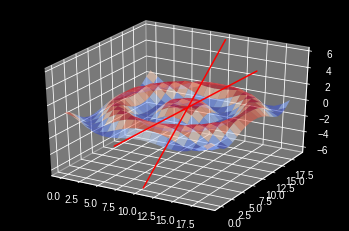

In [ ]:
flatten = lambda x : [i for j in x for i in j]
x = np.array([list(range(20)) for i in range(20)])
z = np.array([[i]*20 for i in range(20)])
y = np.array([[f(x[j,i], z[j,i]) for j in range(20)] for i in range(20)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, z, y, cmap=cm.coolwarm, alpha=0.65)

c1 = f(xxx,zzz) - xxx*d_f_d_x(xxx,zzz)
c2 = f(xxx,zzz) - zzz*d_f_d_z(xxx,zzz)

xx1 = list(range(20))
zz1 = [zzz for i in range(20)]
yy1 = [i*d_f_d_x(xxx,zzz)+c1 for i in xx1]

xx2 = [xxx for i in range(20)]
zz2 = list(range(20))
yy2 = [i*d_f_d_z(xxx,zzz)+c2 for i in zz2]

ax.plot(zz1, xx1, yy1, c="red")
ax.plot(zz2, xx2, yy2, c="red")

plt.show()

# final

f = sin((x**2 + z**2)**0.5)
df/dx = 1.0*x*(x**2 + z**2)**(-0.5)*cos((x**2 + z**2)**0.5)
df/dx = 1.0*z*(x**2 + z**2)**(-0.5)*cos((x**2 + z**2)**0.5)


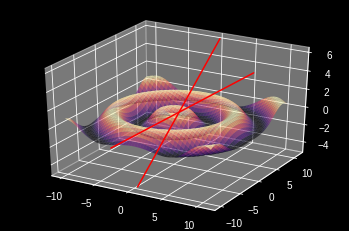

In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

plt.style.use('dark_background')

def plot_tangents(f, coords=(0, 0), val_range=(-10, 10), resolution=256, cmap=cm.coolwarm):
  xxx, zzz = coords
  x, z = Symbol('x'), Symbol('z')
  d_f_d_z = f.diff(z)
  d_f_d_x = f.diff(x)
  print(f"f = {f}\ndf/dx = {d_f_d_x}\ndf/dx = {d_f_d_z}")
  d_f_d_z = lambdify((z,x), d_f_d_z)
  d_f_d_x = lambdify((z,x), d_f_d_x)
  f = lambdify((x, z), f)
  flatten = lambda x : [i for j in x for i in j]
  x = np.array([list(np.linspace(*val_range, resolution)) for i in np.linspace(*val_range, resolution)])
  z = np.array([[i]*(resolution) for i in np.linspace(*val_range, resolution)])
  y = np.array([[f(x[j,i], z[j,i]) for j in range(resolution)] for i in range(resolution)])
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x, z, y, cmap=cmap, alpha=0.65)
  c1 = f(xxx,zzz) - xxx*d_f_d_x(xxx,zzz)
  c2 = f(xxx,zzz) - zzz*d_f_d_z(xxx,zzz)
  xx1 = list(np.linspace(*val_range, resolution))
  zz1 = [zzz for i in np.linspace(*val_range, resolution)]
  yy1 = [i*d_f_d_x(xxx,zzz)+c1 for i in xx1]
  xx2 = [xxx for i in np.linspace(*val_range, resolution)]
  zz2 = list(np.linspace(*val_range, resolution))
  yy2 = [i*d_f_d_z(xxx,zzz)+c2 for i in zz2]
  ax.plot(zz1, xx1, yy1, c="red")
  ax.plot(zz2, xx2, yy2, c="red")
  plt.show()

x, z = Symbol('x'), Symbol('z')
f = sin((x**2 + z**2)**0.5)

plot_tangents(f, (0.5, 0.5), (-10, 11), 500, "magma")